<a href="https://colab.research.google.com/github/bbangchai/facembti/blob/main/UOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as rc
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [ ]:
rc('font', family='ApppleGothic')
plt.rcParams['axes.unicode_minus'] = False

TypeError: ignored

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UOS/sample_submission.csv', encoding='utf-8')
sample_submission.head(3)

,일시,광진구,동대문구,성동구,중랑구
0,20220101,0,0,0,0
1,20220102,0,0,0,0
2,20220103,0,0,0,0


In [ ]:
sample_submission.tail(3)

,일시,광진구,동대문구,성동구,중랑구
331,20221128,0,0,0,0
332,20221129,0,0,0,0
333,20221130,0,0,0,0


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UOS/train.csv', encoding='utf-8')
data.head(3)

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288


In [ ]:
#기초 통계량 확인
data.describe()

,일시,광진구,동대문구,성동구,중랑구
count,1.461000e+03,1461.000000,1461.000000,1461.000000,1461.000000
mean,2.019567e+07,6.209194,4.233670,5.182951,3.138747
std,1.118630e+04,3.531408,2.695602,2.937556,2.046930
min,2.018010e+07,0.000000,0.000000,0.000000,0.000000
25%,2.019010e+07,3.256000,2.068000,2.676000,1.456000
50%,2.020010e+07,5.740000,3.588000,4.850000,2.596000
75%,2.020123e+07,9.444000,6.212000,7.704000,4.768000
max,2.021123e+07,15.184000,11.708000,13.366000,8.028000


In [ ]:
# 컬럼별 기본 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      1461 non-null   int64  
 1   광진구     1461 non-null   float64
 2   동대문구    1461 non-null   float64
 3   성동구     1461 non-null   float64
 4   중랑구     1461 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 57.2 KB


In [ ]:
# 결측치 확인 -> 결측치 x
data.isna().sum()

일시      0
광진구     0
동대문구    0
성동구     0
중랑구     0
dtype: int64

In [ ]:
# 일시 오름차순 정렬
data.sort_values('일시', ascending=True, inplace=True)
data.head(3)

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288


In [ ]:
# index datetime화
data['일시'] = pd.to_datetime(data['일시'].astype(str))
data.set_index(data['일시'],inplace=True)
data.drop('일시', axis=1, inplace=True)
data.head(3)

,광진구,동대문구,성동구,중랑구
일시,,,,
2018-01-01,0.592,0.368,0.580,0.162
2018-01-02,0.840,0.614,1.034,0.260
2018-01-03,0.828,0.576,0.952,0.288


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_

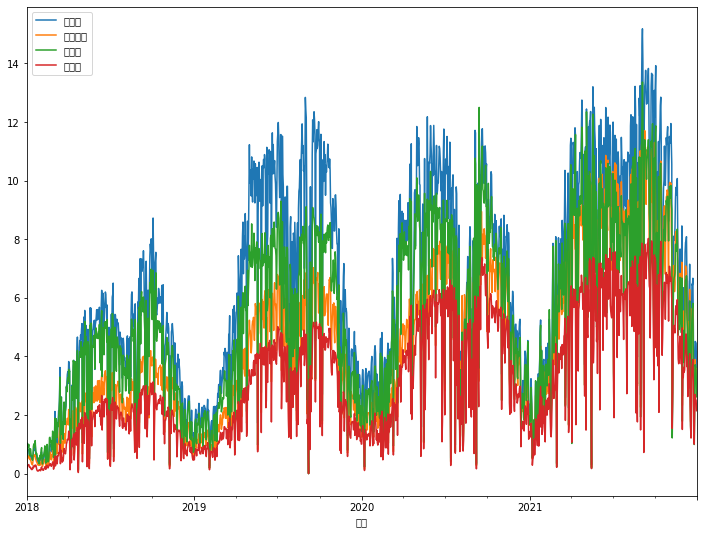

In [ ]:
# 데이터 추세 확인
plt.figure(figsize=(12,9))

for gu in data.columns:
  data[str(gu)].plot()
plt.legend()
plt.show()

In [ ]:
# train, test 데이터 분할 -> 시계열이기 때문에 train_test_split 사용 X (8:2 분할)
div = round(len(data) * 0.8)

train = data.iloc[:div, :]
test = data.iloc[div:, :]

In [ ]:
print(len(train), len(test))

1169 292


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# 윈터 홀트 모델 사용을 위해서는 모든 값이 양수여야 함 -> 양수가 아닌 값 때문에 에러 발생
kj = ExponentialSmoothing(train['광진구'], trend='mul',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: ignored

In [ ]:
# 에러 확인
for gu in data.columns:
  zero = (data.loc[:, str(gu)] <= 0).sum()
  print(str(gu), zero)

광진구 1
동대문구 1
성동구 1
중랑구 1


In [ ]:
# 에러 위치 확인
for i in range(len(data)):
  for j in range(len(data.columns)):
    if data.iloc[i,j] == 0:
      print(i)

614
614
614
614


In [ ]:
# 같은 일자에 데이터가 0 -> 결측치를 0으로 대치한 것으로 판단하여 전후날 평균값으로 대치
data.iloc[614, :] = data.iloc[613:616,:].mean()
data.iloc[614, :]

광진구     2.616667
동대문구    1.351333
성동구     1.897333
중랑구     1.168667
Name: 2019-09-07 00:00:00, dtype: float64

In [ ]:
# 홀트-윈터이기 때문에 trend, seasonal = mul로 설정하고 일별 데이터기 때문에 seasonal_periods = 365 설정
kj = ExponentialSmoothing(train['광진구'], trend='mul',seasonal='mul',seasonal_periods=365).fit()
ddm = ExponentialSmoothing(train['동대문구'], trend='mul',seasonal='mul',seasonal_periods=365).fit()
sd = ExponentialSmoothing(train['성동구'], trend='mul',seasonal='mul',seasonal_periods=365).fit()
jr = ExponentialSmoothing(train['중랑구'], trend='mul',seasonal='mul',seasonal_periods=365).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/

In [ ]:
# 예측
pred_kj = kj.forecast(720)
pred_ddm = ddm.forecast(720)
pred_sd = sd.forecast(720)
pred_jr = jr.forecast(720)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

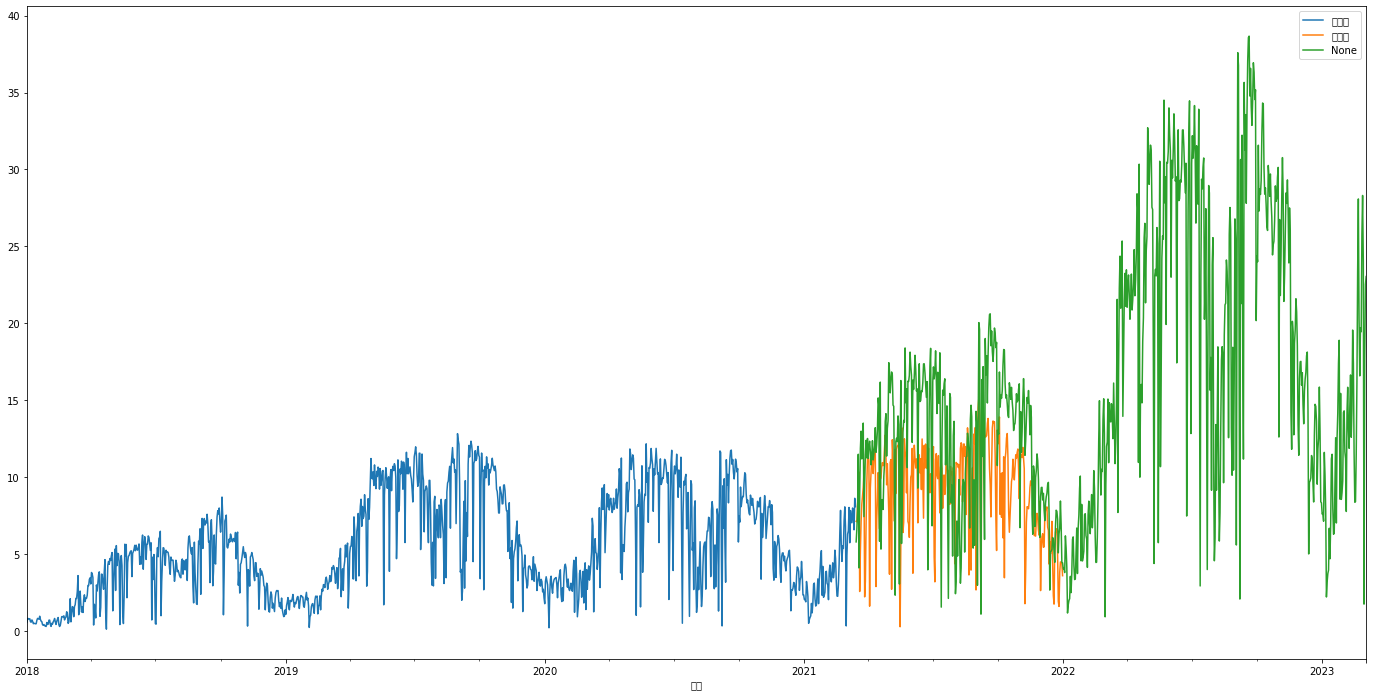

In [ ]:
# 예측값 비교 - 광진구
plt.figure(figsize=(24,12))

train['광진구'].plot()
test['광진구'].plot()
pred_kj.plot()
plt.legend()
plt.show()

In [ ]:
len(test['광진구']) == len(pred_kj)
print(len(test['광진구']), len(pred_kj))

292 720


In [ ]:
pred_kj_cut = pred_kj[:292]
test_kj = test['광진구']

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE_kj = mean_absolute_error(test_kj, pred_kj_cut)
MSE_kj = mean_squared_error(test_kj, pred_kj_cut)

print('Mean Absolute Error = ' ,MAE_kj)
print('Mean Squared Error = ' ,MSE_kj)

Mean Absolute Error =  4.524804476327152
Mean Squared Error =  30.16807689784288


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_

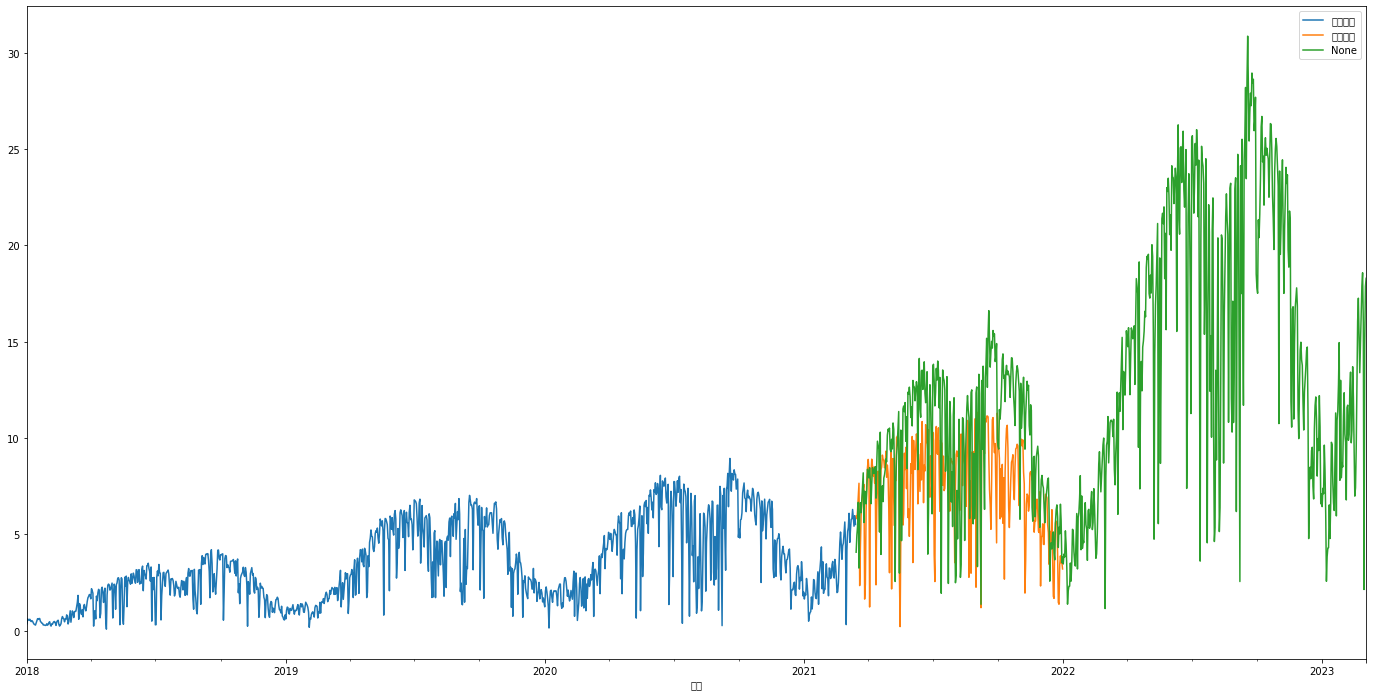

In [ ]:
# 예측값 비교 - 동대문구
plt.figure(figsize=(24,12))

train['동대문구'].plot()
test['동대문구'].plot()
pred_ddm.plot()
plt.legend()
plt.show()

In [ ]:
pred_ddm_cut = pred_ddm[:292]
test_ddm = test['동대문구']

In [ ]:
MAE_ddm = mean_absolute_error(test_ddm, pred_ddm_cut)
MSE_ddm = mean_squared_error(test_ddm, pred_ddm_cut)

print('Mean Absolute Error = ' ,MAE_ddm)
print('Mean Squared Error = ' ,MSE_ddm)

Mean Absolute Error =  3.2759850830997297
Mean Squared Error =  16.349713715584627


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

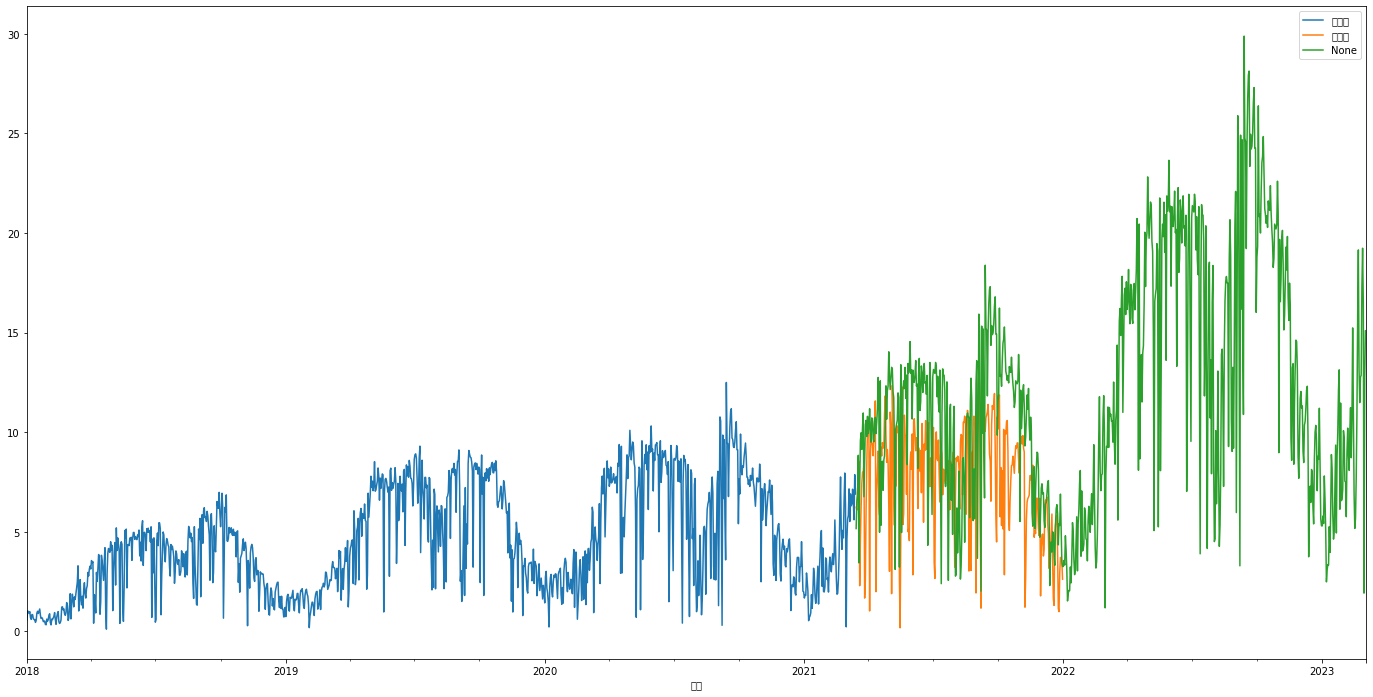

In [ ]:
# 예측값 비교 - 성동구
plt.figure(figsize=(24,12))

train['성동구'].plot()
test['성동구'].plot()
pred_sd.plot()
plt.legend()
plt.show()

In [ ]:
pred_sd_cut = pred_sd[:292]
test_sd = test['성동구']

In [ ]:
MAE_sd = mean_absolute_error(test_sd, pred_sd_cut)
MSE_sd = mean_squared_error(test_sd, pred_sd_cut)

print('Mean Absolute Error = ' ,MAE_sd)
print('Mean Squared Error = ' ,MSE_sd)

Mean Absolute Error =  3.5711494801202712
Mean Squared Error =  19.22642355411232


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46993 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

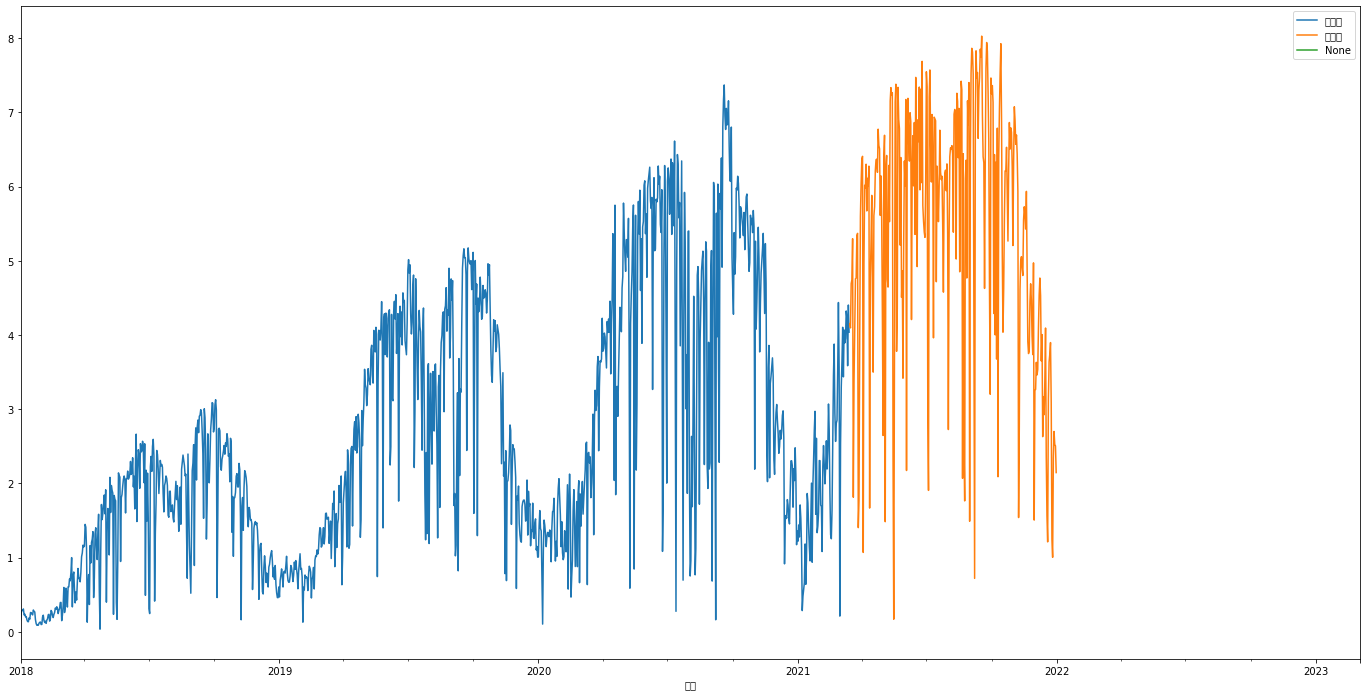

In [ ]:
# 예측값 비교 - 중랑
plt.figure(figsize=(24,12))

train['중랑구'].plot()
test['중랑구'].plot()
pred_jr.plot()
plt.legend()
plt.show()

In [ ]:
pred_jr_cut = pred_jr[:292]
test_jr = test['중랑구']

In [ ]:
# 흠...
MAE_jr = mean_absolute_error(test_jr, pred_jr_cut)
MSE_jr = mean_squared_error(test_jr, pred_jr_cut)

print('Mean Absolute Error = ' ,MAE_jr)
print('Mean Squared Error = ' ,MSE_jr)

ValueError: ignored

In [ ]:
pred_jr_cut.isna().sum()

292

## 수요예측은 상향식 예측보다는 하향식 예측이 정확도 높음
## 이를 적용

In [ ]:
# 수요 합산
train_sum = pd.DataFrame(train.sum(axis=1))
train_sum.columns = ['use']
train_sum.head(3)

,use
일시,
2018-01-01,1.702
2018-01-02,2.748
2018-01-03,2.644


In [ ]:
test_sum = pd.DataFrame(test.sum(axis=1))
test_sum.columns = ['use']
test_sum.head(3)

,use
일시,
2021-03-15,23.482
2021-03-16,23.122
2021-03-17,26.458


In [ ]:
# 각각의 구의 비중 구하기
total = train.sum().sum()
each = train.sum()

kj_per = each['광진구'] / total
ddm_per = each['동대문구'] / total
sd_per = each['성동구'] / total
jr_per = each['중랑구'] / total

print(kj_per, ddm_per, sd_per, jr_per)

0.34152959163792346 0.21338967619426816 0.28431922113877967 0.1607615110290288


In [ ]:
train_total = ExponentialSmoothing(train_sum, trend='mul',seasonal='mul',seasonal_periods=365).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [ ]:
pred_total = train_total.forecast(720)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<Figure size 1728x864 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


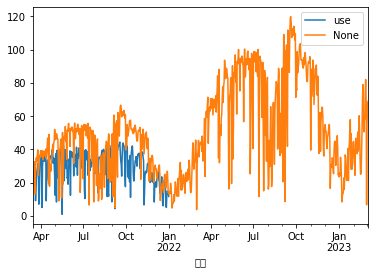

In [ ]:
plt.figure(figsize=(24,12))

test_sum.plot()
pred_total.plot()
plt.legend()
plt.show()

In [ ]:
len(test) == len(pred_total)
print(len(test), len(pred_total))

292 720


In [ ]:
pred_total_cut = pred_total[:292]
test_sum_cut = test_sum

In [ ]:
MAE_total = mean_absolute_error(test_sum_cut, pred_total_cut)
MSE_total = mean_squared_error(test_sum_cut, pred_total_cut)

print('Mean Absolute Error = ' ,MAE_total)
print('Mean Squared Error = ' ,MSE_total)

Mean Absolute Error =  14.20332480670386
Mean Squared Error =  298.4758042435998


In [ ]:
pred_total_kj = pred_total * kj_per
pred_total_ddm = pred_total * ddm_per
pred_total_sd = pred_total * sd_per
pred_total_jr = pred_total * jr_per

pred_total_kj.head(3)

2021-03-15    6.243337
2021-03-16    7.444876
2021-03-17    8.346720
Freq: D, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

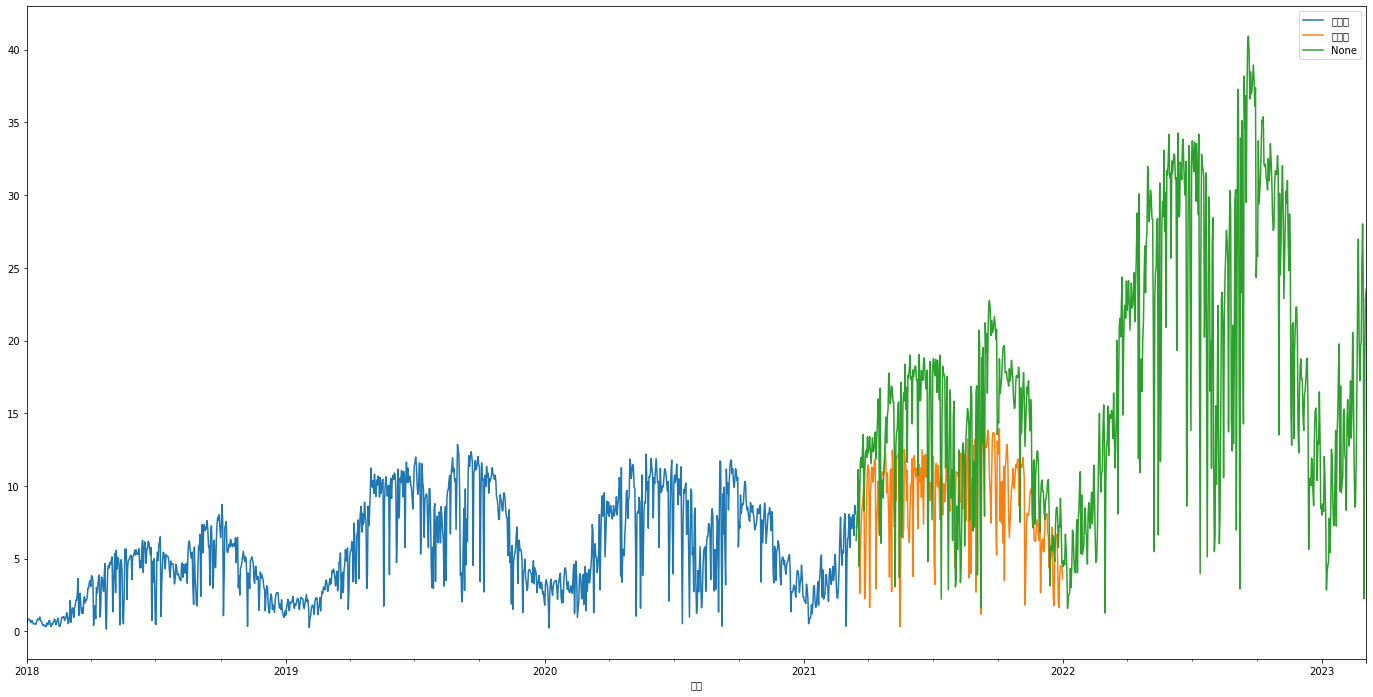

In [ ]:
# 예측값 비교2 - 광진구
plt.figure(figsize=(24,12))

train['광진구'].plot()
test['광진구'].plot()
pred_total_kj.plot()
plt.legend()
plt.show()

In [ ]:
pred_total_kj_cut = pred_total_kj[:292]

MAE_total_kj = mean_absolute_error(test_kj, pred_total_kj_cut)
MSE_total_kj = mean_squared_error(test_kj, pred_total_kj_cut)

print('Mean Absolute Error = ' ,MAE_total_kj)
print('Mean Squared Error = ' ,MSE_total_kj)

Mean Absolute Error =  5.409732086290803
Mean Squared Error =  41.34690727126643


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_

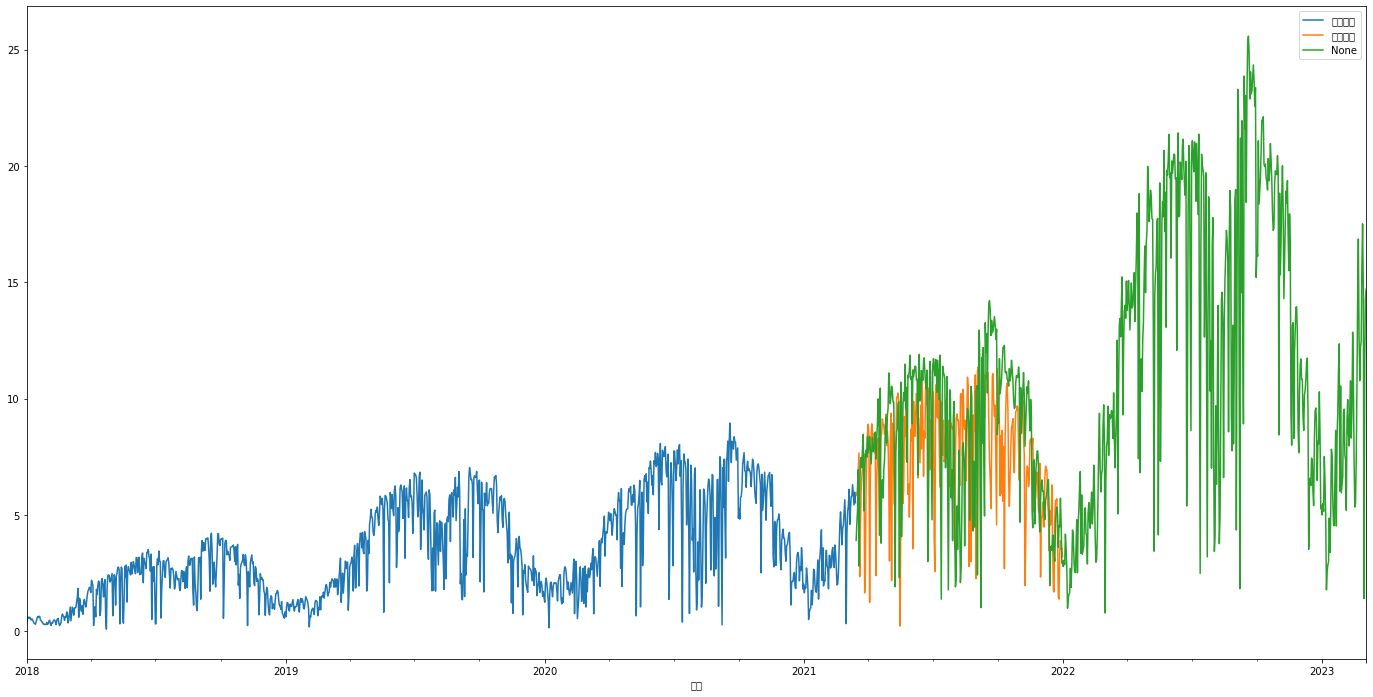

In [ ]:
# 예측값 비교2 - 동대문구
plt.figure(figsize=(24,12))

train['동대문구'].plot()
test['동대문구'].plot()
pred_total_ddm.plot()
plt.legend()
plt.show()

In [ ]:
pred_total_ddm_cut = pred_total_ddm[:292]

MAE_total_ddm = mean_absolute_error(test_ddm, pred_total_ddm_cut)
MSE_total_ddm = mean_squared_error(test_ddm, pred_total_ddm_cut)

print('Mean Absolute Error = ' ,MAE_total_ddm)
print('Mean Squared Error = ' ,MSE_total_ddm)

Mean Absolute Error =  2.6361520496973596
Mean Squared Error =  11.41877979597615


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

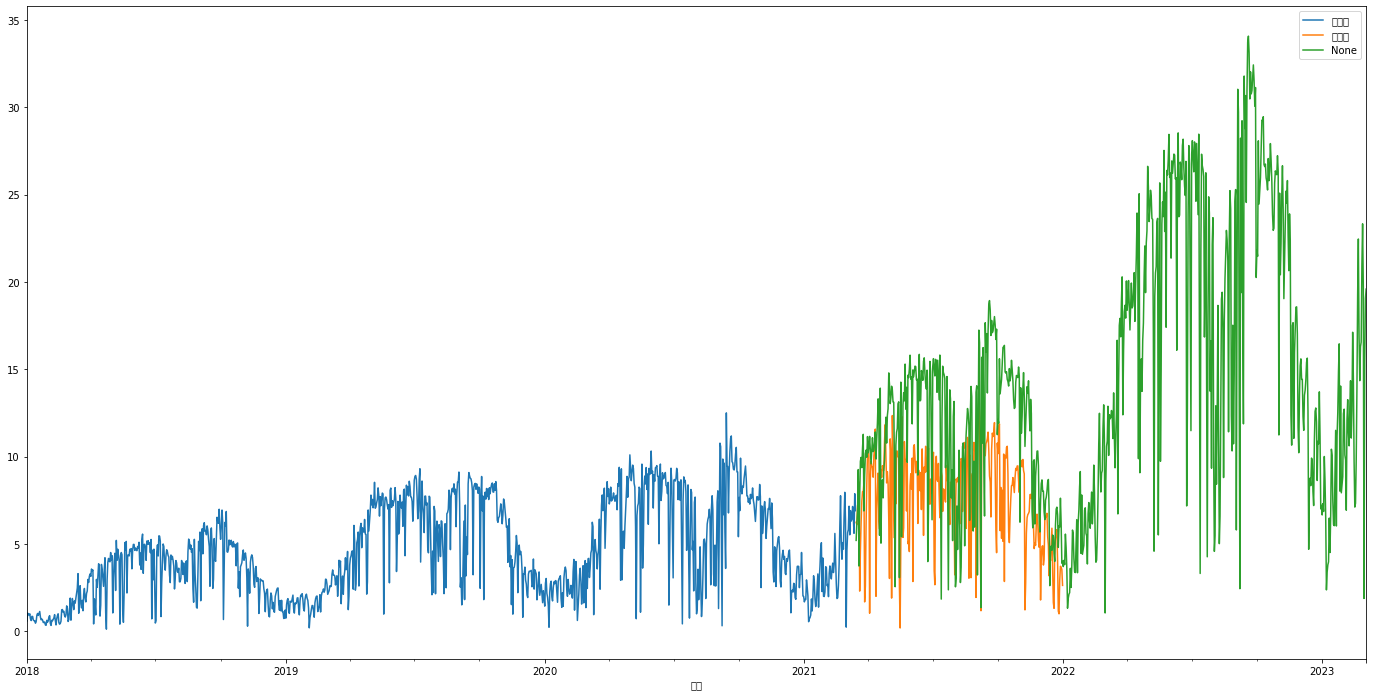

In [ ]:
# 예측값 비교2 - 성동구
plt.figure(figsize=(24,12))

train['성동구'].plot()
test['성동구'].plot()
pred_total_sd.plot()
plt.legend()
plt.show()

In [ ]:
pred_total_sd_cut = pred_total_sd[:292]

MAE_total_sd = mean_absolute_error(test_sd, pred_total_sd_cut)
MSE_total_sd = mean_squared_error(test_sd, pred_total_sd_cut)

print('Mean Absolute Error = ' ,MAE_total_sd)
print('Mean Squared Error = ' ,MSE_total_sd)

Mean Absolute Error =  4.479491289411011
Mean Squared Error =  28.834462603910104


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46993 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

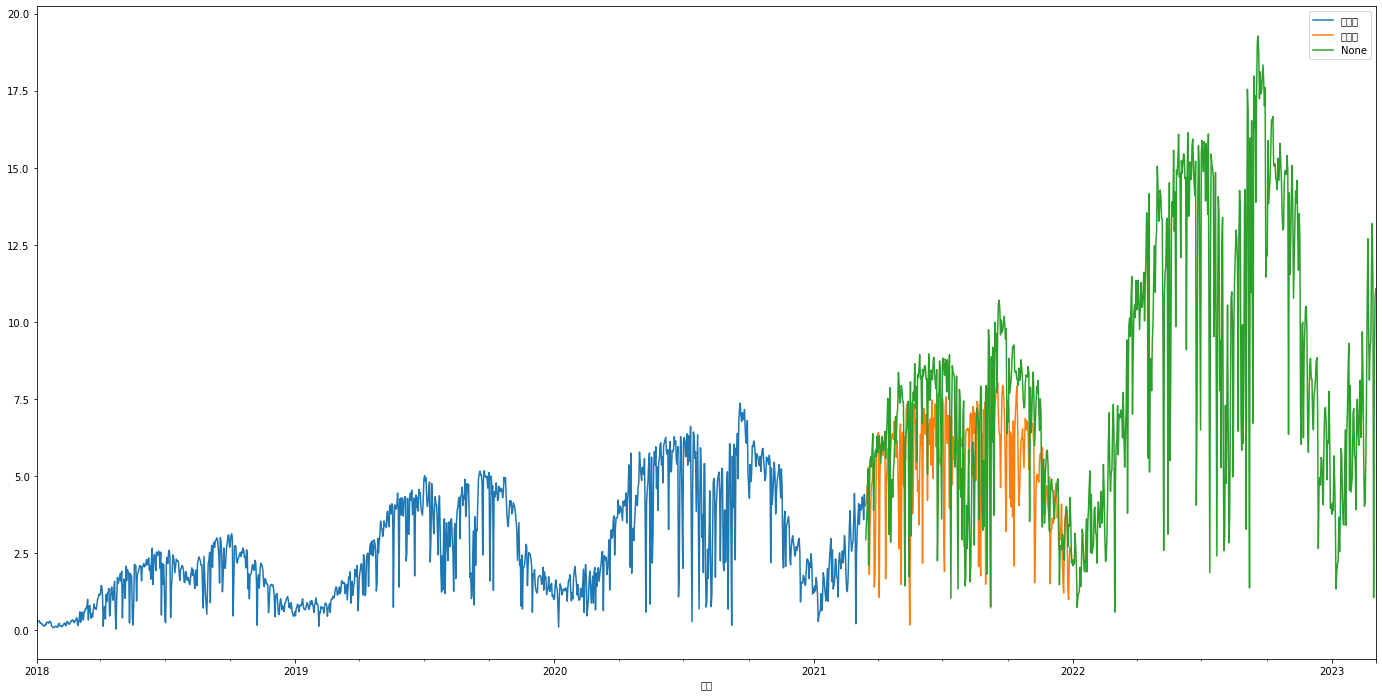

In [ ]:
# 예측값 비교2 - 중랑
plt.figure(figsize=(24,12))

train['중랑구'].plot()
test['중랑구'].plot()
pred_total_jr.plot()
plt.legend()
plt.show()

In [ ]:
pred_total_jr_cut = pred_total_jr[:292]

MAE_total_jr = mean_absolute_error(test_jr, pred_total_jr_cut)
MSE_total_jr = mean_squared_error(test_jr, pred_total_jr_cut)

print('Mean Absolute Error = ' ,MAE_total_jr)
print('Mean Squared Error = ' ,MSE_total_jr)

Mean Absolute Error =  1.995022281918554
Mean Squared Error =  6.316310960743563


In [ ]:
idx = ['광진구', '동대문구', '성동구', '중랑구', '총합', '광진구_하향식', '동대문구_하향식', '성동구_하향식', '중랑구_하향식']
MAE = [MAE_kj, MAE_ddm, MAE_sd, None, MAE_total, MAE_total_kj, MAE_total_ddm, MAE_total_sd, MAE_total_jr]
MSE = [MSE_kj, MSE_ddm, MSE_sd, None, MSE_total, MSE_total_kj, MSE_total_ddm, MSE_total_sd, MSE_total_jr]

verify_value = pd.DataFrame({'MAE' : MAE,
              'MSE' : MSE},
              index = idx)

In [ ]:
verify_value

,MAE,MSE
광진구,4.524804,30.168077
동대문구,3.275985,16.349714
성동구,3.571149,19.226424
중랑구,NaN,NaN
총합,14.203325,298.475804
광진구_하향식,5.409732,41.346907
동대문구_하향식,2.636152,11.418780
성동구_하향식,4.479491,28.834463
중랑구_하향식,1.995022,6.316311


In [ ]:
result = pd.DataFrame({'광진구': pred_total_jr,
                       '동대문구': pred_total_ddm,
                       '성동구': pred_total_sd,
                       '중랑구': pred_total_jr},
                      index = pred_total_jr.index)

In [ ]:
result = result.iloc[292:657,:]

In [ ]:
result

,광진구,동대문구,성동구,중랑구
2022-01-01,2.090389,2.774715,3.697015,2.090389
2022-01-02,2.293170,3.043881,4.055650,2.293170
2022-01-03,2.153595,2.858613,3.808800,2.153595
2022-01-04,3.142191,4.170843,5.557208,3.142191
2022-01-05,2.710186,3.597414,4.793174,2.710186
...,...,...,...,...
2022-12-27,6.065030,8.050527,10.726477,6.065030
2022-12-28,7.749432,10.286348,13.705473,7.749432
2022-12-29,6.313343,8.380129,11.165637,6.313343
2022-12-30,3.958577,5.254488,7.001051,3.958577
